## Dice-Based Aggregate Examples

In [9]:
sys.path.append('c:\\s\\telos\\python\\aggregate_project')
from aggregate import build
build.logger_level(30)

time: 0 ns (started: 2022-07-06 20:08:42 -04:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,1.000,,,0.000,,,
Agg,3.500,3.500,-111.022a,487.950m,487.950m,222.045a,0.000


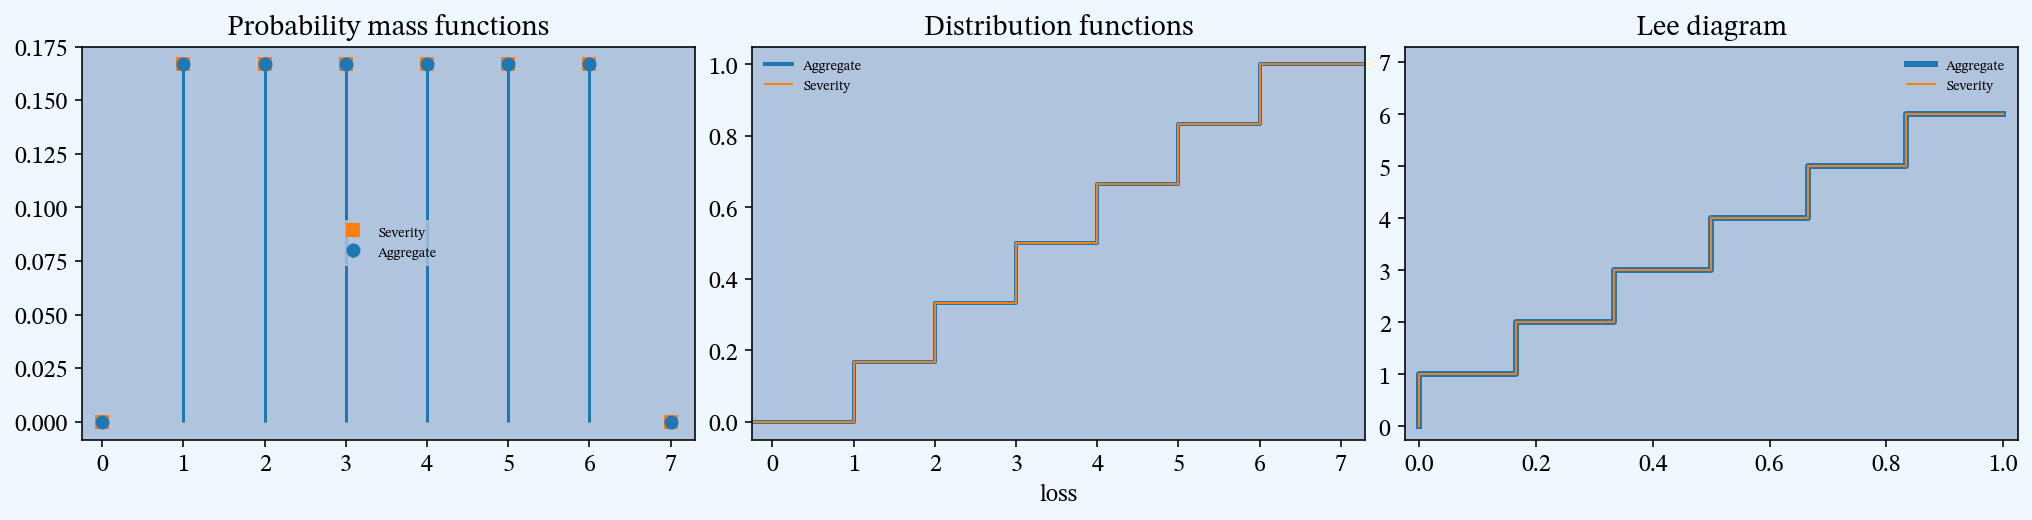

time: 531 ms (started: 2022-07-06 20:08:44 -04:00)


In [10]:
one_dice = build('agg OneDice dfreq [1] dsev [1:6]')
one_dice.plot()
one_dice

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,2.000,,,0.000,,,
Agg,7.000,7.000,-333.067a,345.033m,345.033m,-2.220f,0.000


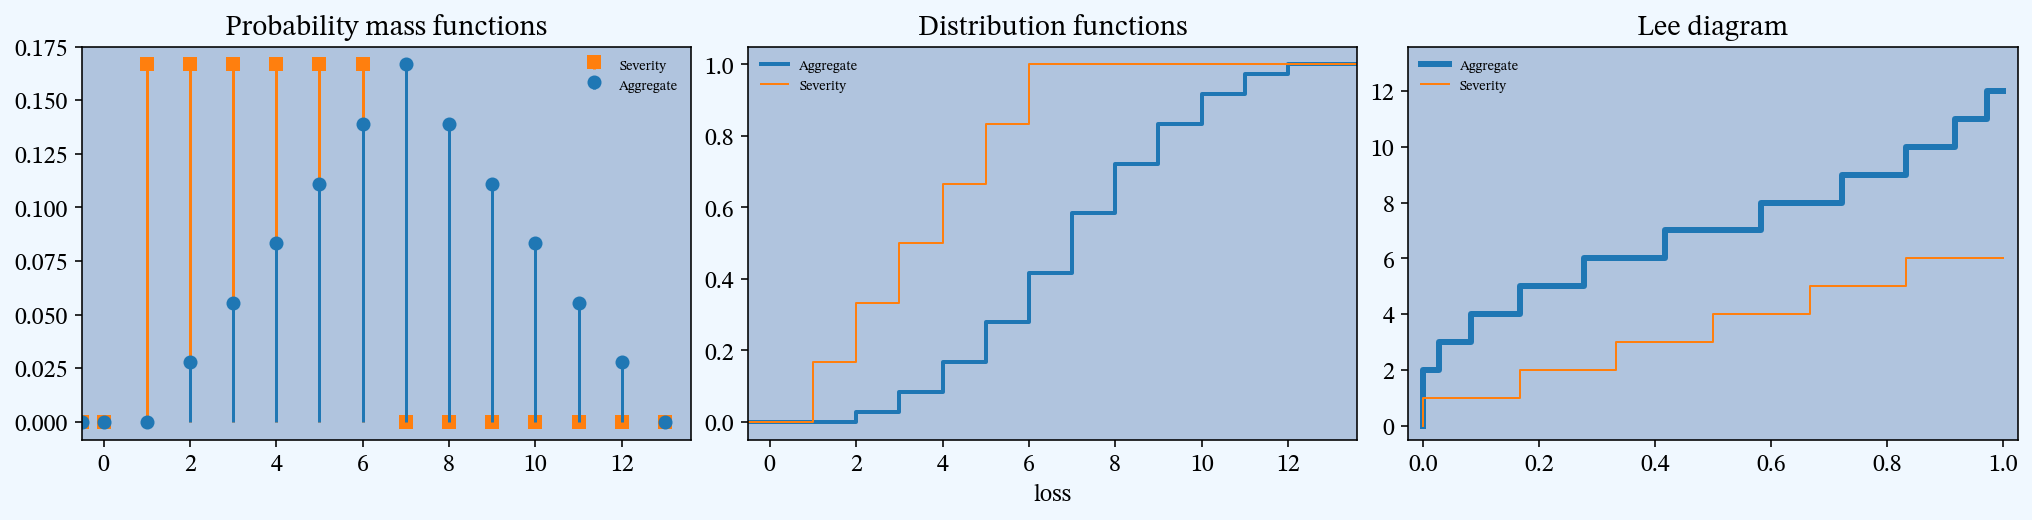

time: 563 ms (started: 2022-07-06 20:08:45 -04:00)


In [11]:
two_dice = build('agg TwoDice dfreq [2] dsev [1:6]')
two_dice.plot()
two_dice

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,12.000,,,0.000,,,
Agg,42.000,42.000,1.332f,140.859m,140.859m,148.104f,0.000


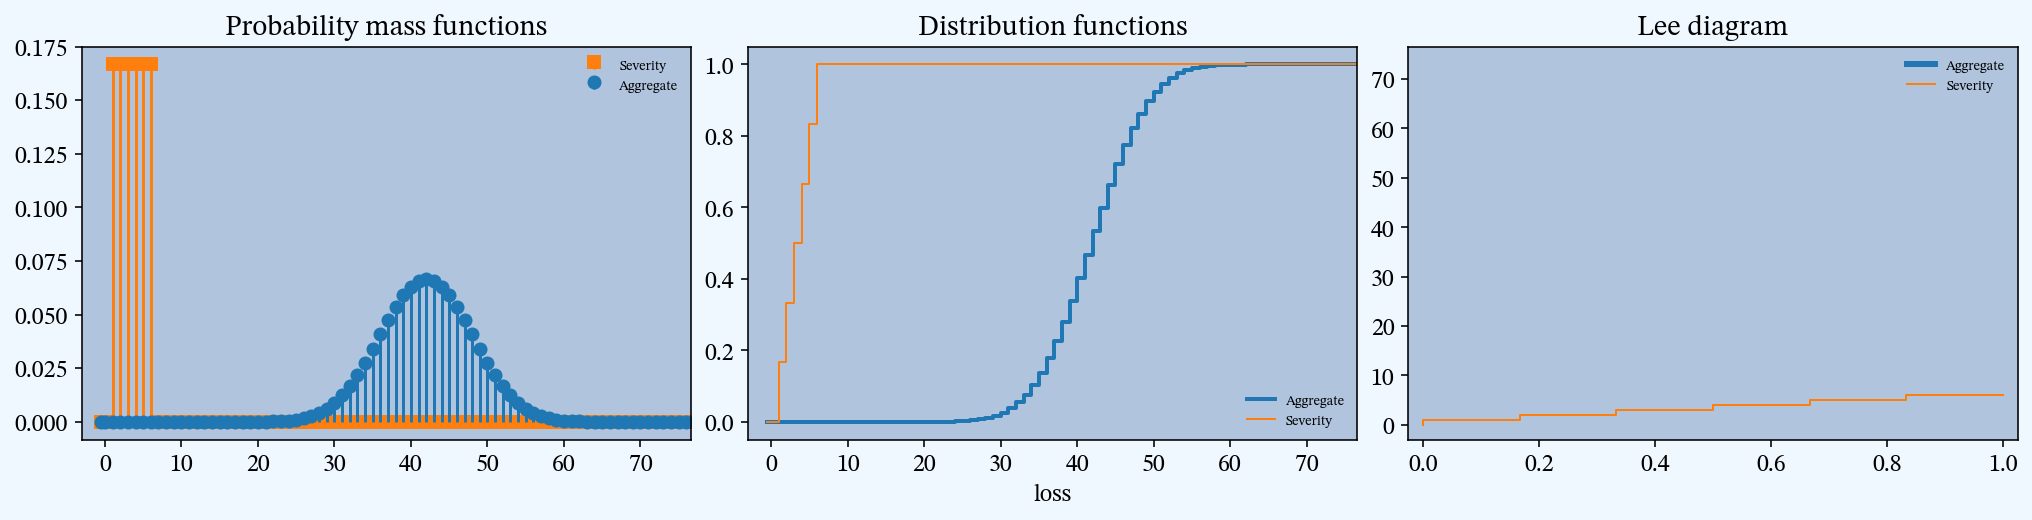

time: 547 ms (started: 2022-07-06 20:22:44 -04:00)


In [48]:
# twelve dice
twelve_dice = build('agg TwelveDice dfreq [12] dsev [1:6]')
twelve_dice.plot()
twelve_dice

In [13]:
twelve_dice.report_df

view,0,Independent,Mixed,Empirical,Error
statistic,,,,,
Name,TwelveDice,TwelveDice,TwelveDice,,
Limit,inf,inf,inf,,
Attachment,0.000,0.000,0.000,,
Expected Loss,42.000,42.000,42.000,,
Freqency Mean,12.000,12.000,12.000,,
Freqency CV,0.000,0.000,0.000,,
Freqency Skewness,,,,,
Severity Mean,3.500,3.500,3.500,3.500,0.000
Severity CV,0.488,0.488,0.488,0.488,-0.000


time: 16 ms (started: 2022-07-06 20:09:45 -04:00)


### Compare to a normal approximation

In [22]:
# report_ser (or statistics_df or audit_df) contains the theoretic moments
mean, cv = twelve_dice.report_ser[('agg', 'ex1')], twelve_dice.report_ser[('agg', 'cv')]
sd = mean * cv
import scipy.stats as ss
fz = ss.norm(loc=mean, scale=sd)

time: 0 ns (started: 2022-07-06 20:12:07 -04:00)


In [45]:
# model dataframe and append normal approx
df = twelve_dice.density_df[['loss', 'p_total']]
df['normal'] = np.diff(fz.cdf(df.loss + 0.5), prepend=0)
df.iloc[32:52]

,loss,p_total,normal
loss,,,
32.000,32.000,16.609m,16.196m
33.000,33.000,21.737m,21.233m
34.000,34.000,27.592m,27.054m
35.000,35.000,33.997m,33.502m
36.000,36.000,40.690m,40.322m
37.000,37.000,47.330m,47.165m
38.000,38.000,53.530m,53.620m
39.000,39.000,58.887m,59.245m
40.000,40.000,63.026m,63.621m


time: 31 ms (started: 2022-07-06 20:21:13 -04:00)


In [46]:
# always use simple figure generator
from aggregate.utils import make_mosaic_figure

time: 0 ns (started: 2022-07-06 20:21:22 -04:00)


<AxesSubplot:label='A', xlabel='loss'>

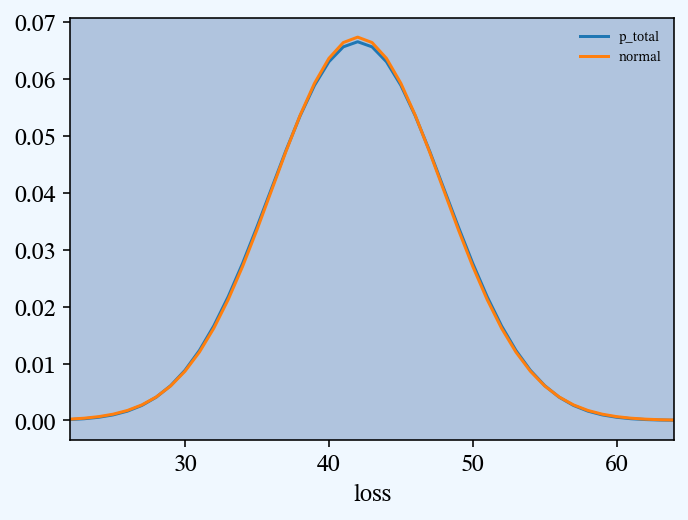

time: 157 ms (started: 2022-07-06 20:21:22 -04:00)


In [47]:
# compare to normal
f, axd = make_mosaic_figure('A')
ax = axd['A']
df.drop(columns=['loss']).plot(ax=ax, xlim=[22, 64])

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


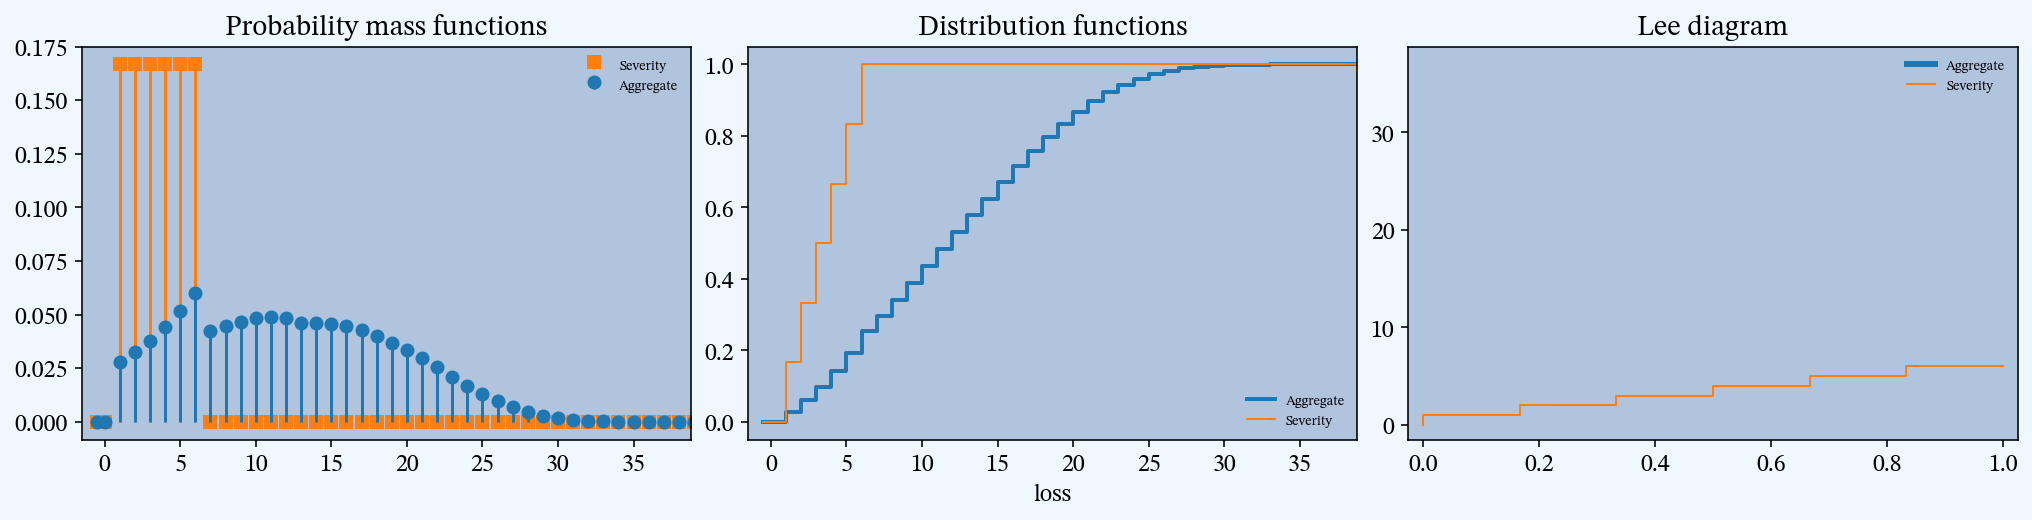

time: 531 ms (started: 2022-07-06 20:23:46 -04:00)


In [49]:
# throw a dice, then throw that many dice
dice2 = build('agg Dice2 dfreq [1:6] dsev [1:6]')
dice2.plot()
dice2

In [54]:
# look at the possible outcomes; some interesting columns
dice2.density_df.query('p_total > 0')[['p_total', 'p_sev', 'F', 'S', 'lev']]

,p_total,p_sev,F,S,lev
loss,,,,,
1.000,27.778m,166.667m,27.778m,972.222m,1.000
2.000,32.407m,166.667m,60.185m,939.815m,1.972
3.000,37.809m,166.667m,97.994m,902.006m,2.912
4.000,44.110m,166.667m,142.104m,857.896m,3.814
5.000,51.462m,166.667m,193.566m,806.434m,4.672
6.000,60.039m,166.667m,253.604m,746.396m,5.478
7.000,42.267m,0.000,295.871m,704.129m,6.225
8.000,44.678m,0.000,340.549m,659.451m,6.929
9.000,46.711m,0.000,387.260m,612.740m,7.588


time: 32 ms (started: 2022-07-06 20:33:25 -04:00)


In [60]:
# highest outcome of 36 has probability 6**-7; check accuracy
a, e = (1/6)**7, dice2.density_df.loc[36, 'p_total']
pd.DataFrame([a, e, e/a-1], index=['Actual worst', 'Computed worst', 'error'], columns=['value'])

,value
Actual worst,3.572u
Computed worst,3.572u
error,-150.324f


time: 0 ns (started: 2022-07-06 20:35:29 -04:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


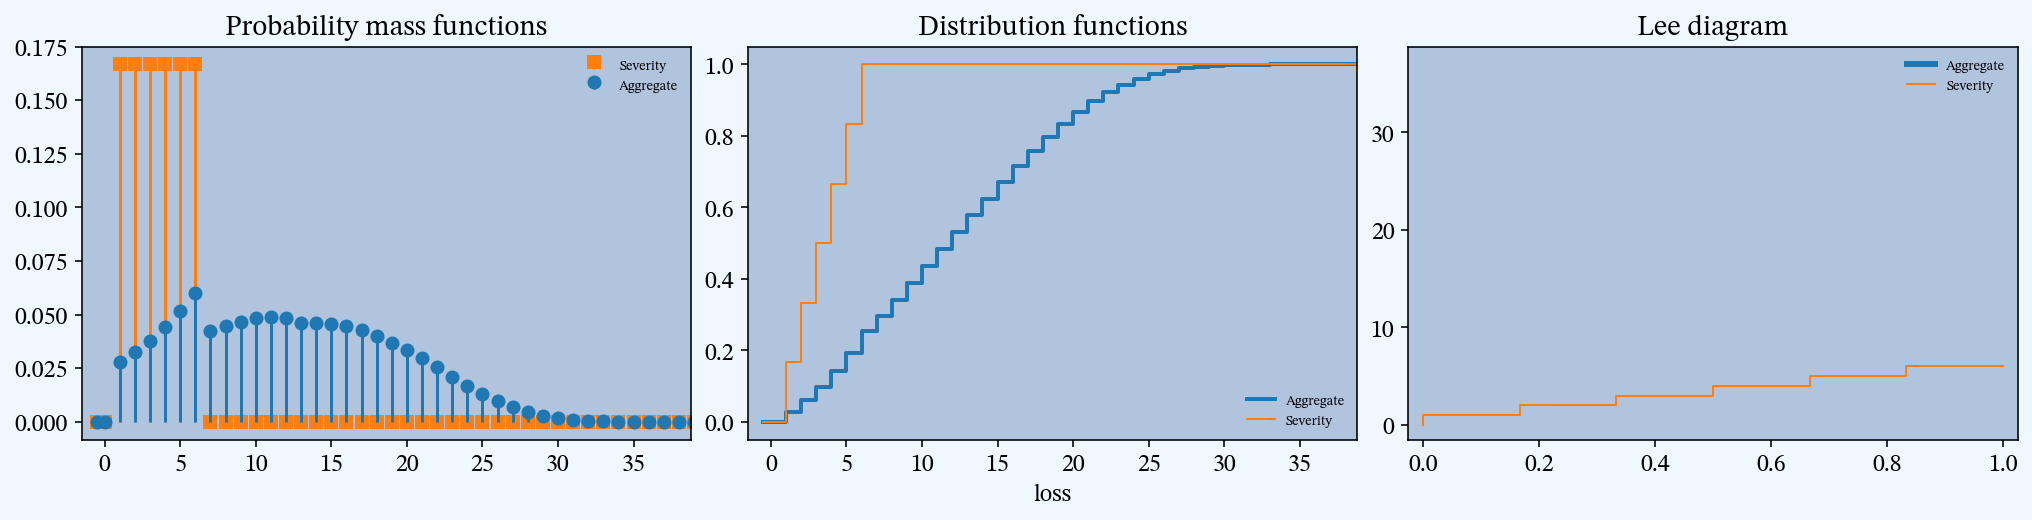

time: 516 ms (started: 2022-07-06 20:37:38 -04:00)


In [64]:
# create without shorthand
dice2a = build('agg Dice2a specified claims dsev [1 2 3 4 5 6]  '
               'nps [1 2 3 4 5 6] ')
dice2a.plot()
dice2a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


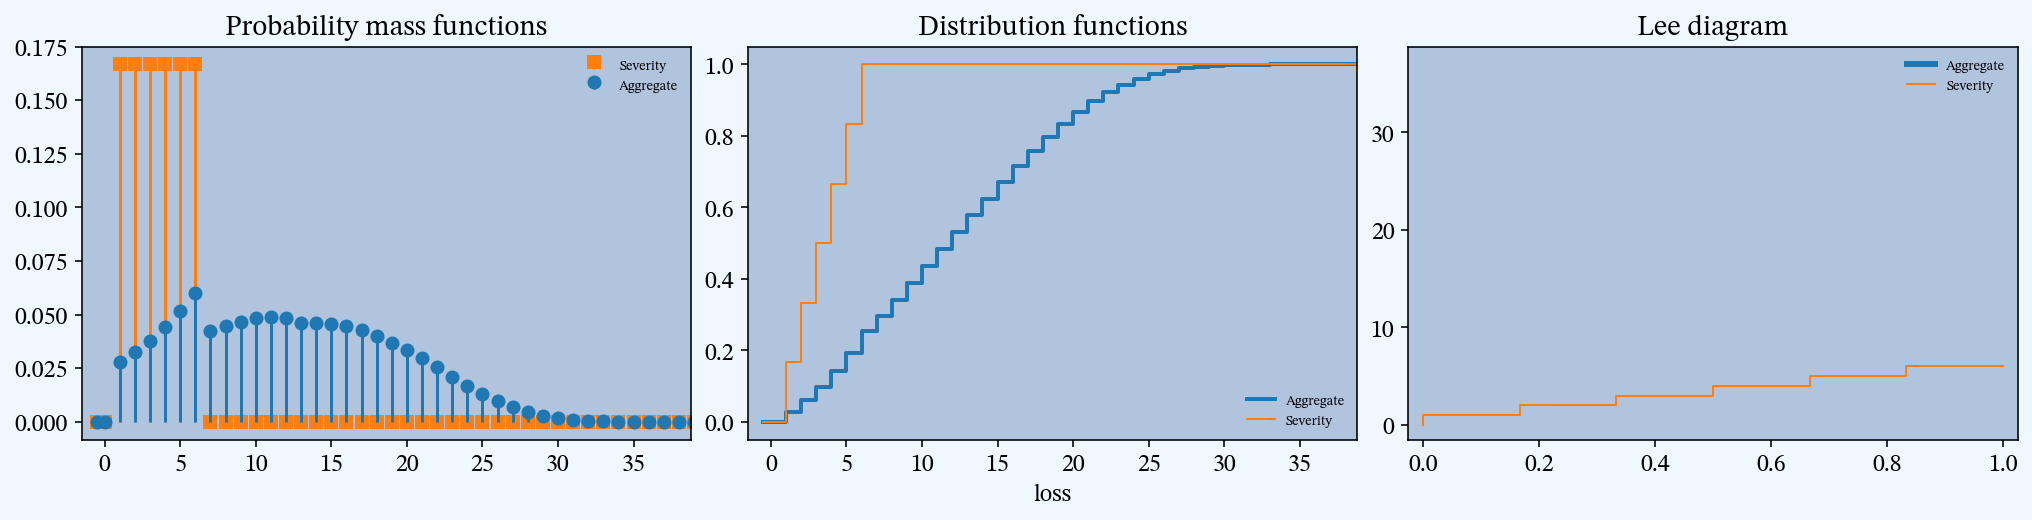

time: 532 ms (started: 2022-07-06 20:37:57 -04:00)


In [66]:
# and in most basic lanugage with explicit weights
dice2b = build('agg Dice2b specified claims sev dhistogram xps [1 2 3 4 5 6] [1/6 1/6 1/6 1/6 1/6 1/6]'
               'nps [1 2 3 4 5 6] [1/6 1/6 1/6 1/6 1/6 1/6]')
dice2b.plot()
dice2b

\
\
Created: July 6, 2022